# Análisis y Preprocesamiento de Datos

Para este ejemplo se utilizará el dataset [Banking Dataset - Marketing Targets](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets) publicado en kaggle.

### Contexto

Los depósitos a plazo son una importante fuente de ingresos para un banco. Un depósito a plazo es una inversión en efectivo que se mantiene en una institución financiera. Su dinero se invierte a un tipo de interés acordado durante un periodo de tiempo fijo, o plazo. El banco tiene varios planes de divulgación para vender depósitos a plazo a sus clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital.

Las campañas de marketing telefónico siguen siendo una de las formas más eficaces para llegar a la gente. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. De ahí que sea crucial identificar de antemano a los clientes con más probabilidades de conversión para poder dirigirse específicamente a ellos a través de una llamada.

Los datos corresponden a campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

### Contenido

Los datos están relacionados con las campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para saber si el producto (depósito bancario a plazo) sería ('sí') o no ('no') suscrito por el cliente. La carpeta de datos contiene dos conjuntos de datos:-.

**train.csv**: 45.211 filas y 18 columnas ordenadas por fecha (de mayo de 2008 a noviembre de 2010)

**test.csv**: 4521 filas y 18 columnas con el 10% de los ejemplos (4521), seleccionados aleatoriamente de train.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

In [ ]:
bmt_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data_Information/Bank_Marketing/train.csv", sep=";")
bmt_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data_Information/Bank_Marketing/test.csv", sep=";")
bmt_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bmt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# 1. Análisis de Datos

## 1.1 Valores unicos

In [ ]:
counts_job = bmt_train["job"].value_counts()
print(counts_job)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


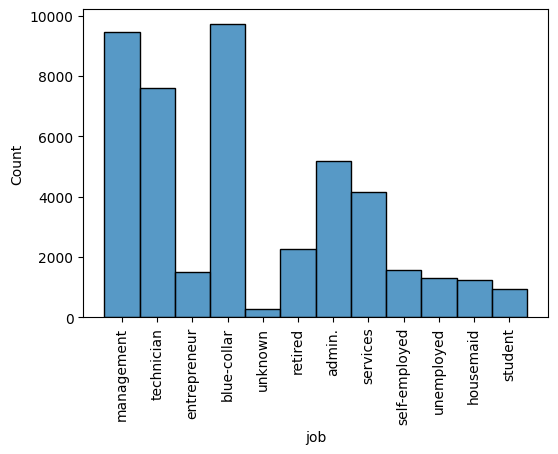

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(counts_job, x=bmt_train["job"])
plt.xticks(rotation = 90);

In [ ]:
counts_marital = bmt_train["marital"].value_counts()
counts_edu = bmt_train["education"].value_counts()
counts_def = bmt_train["default"].value_counts()
counts_house = bmt_train["housing"].value_counts()
counts_loan = bmt_train["loan"].value_counts()
counts_contact = bmt_train["contact"].value_counts()
counts_poutcome = bmt_train["poutcome"].value_counts()
counts_y = bmt_train["y"].value_counts()

col = ["marital", "education", "default",
       "housing", "loan", "contact", "poutcome", "y"]
counts = [counts_marital,counts_edu,
          counts_def,counts_house,counts_loan,
          counts_contact,counts_poutcome,counts_y]

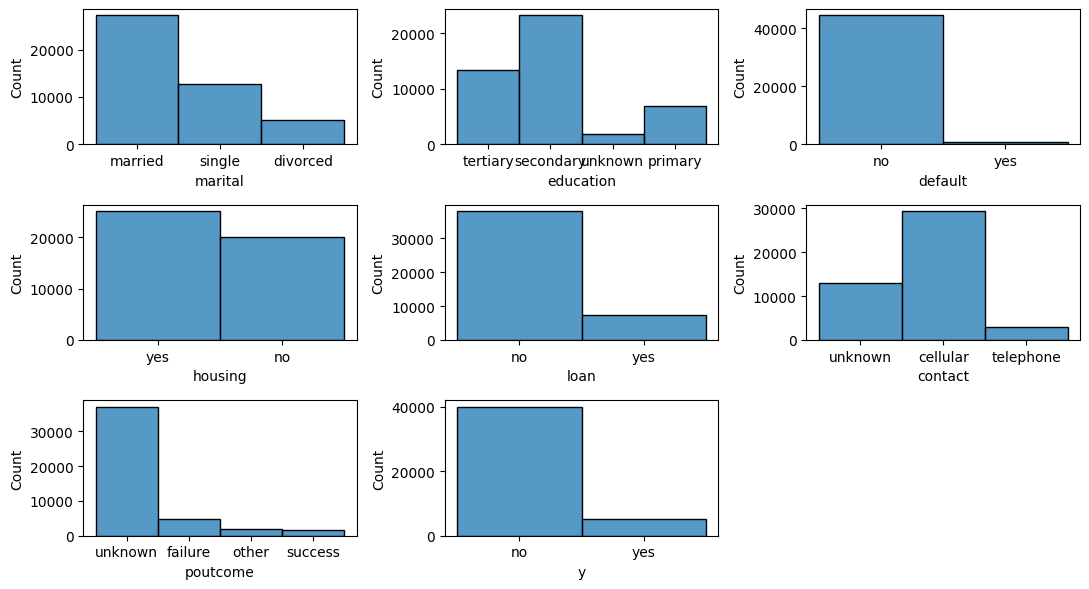

In [ ]:
plt.figure(figsize = (11,6))
for index in range(0, len(col)):
  ax = plt.subplot(3,3, index+1)
  sns.histplot(counts[index], x=bmt_train[col[index]],
               discrete = True, kde=False)
  plt.tight_layout()


In [ ]:
bmt_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<function matplotlib.pyplot.show(close=None, block=None)>

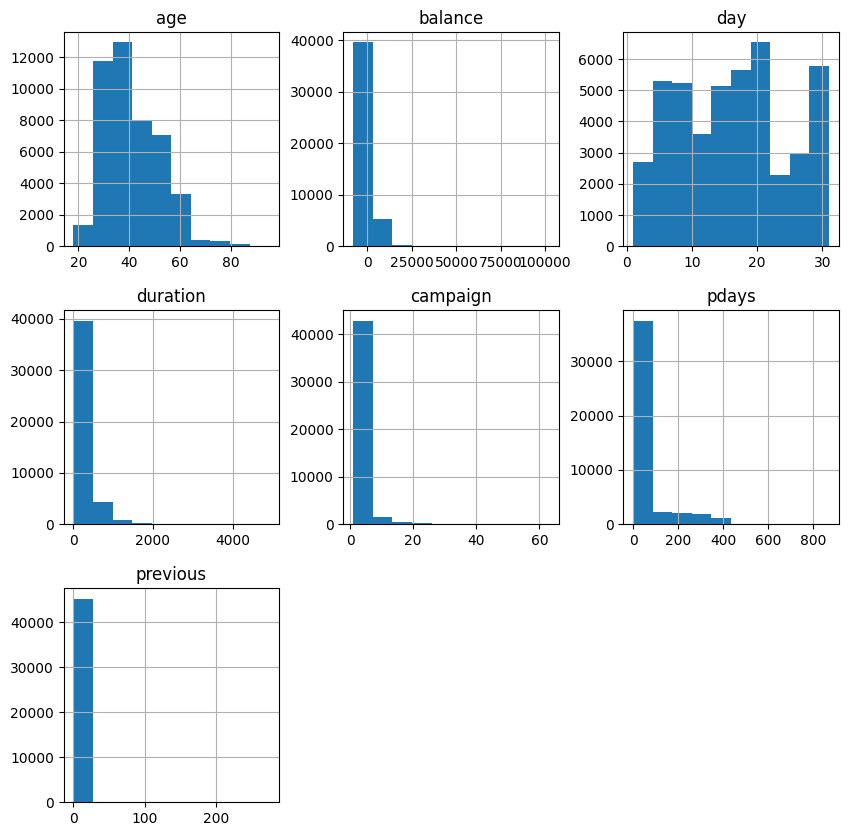

In [ ]:
bmt_train.hist(figsize=(10,10))
plt.show

<Axes: >

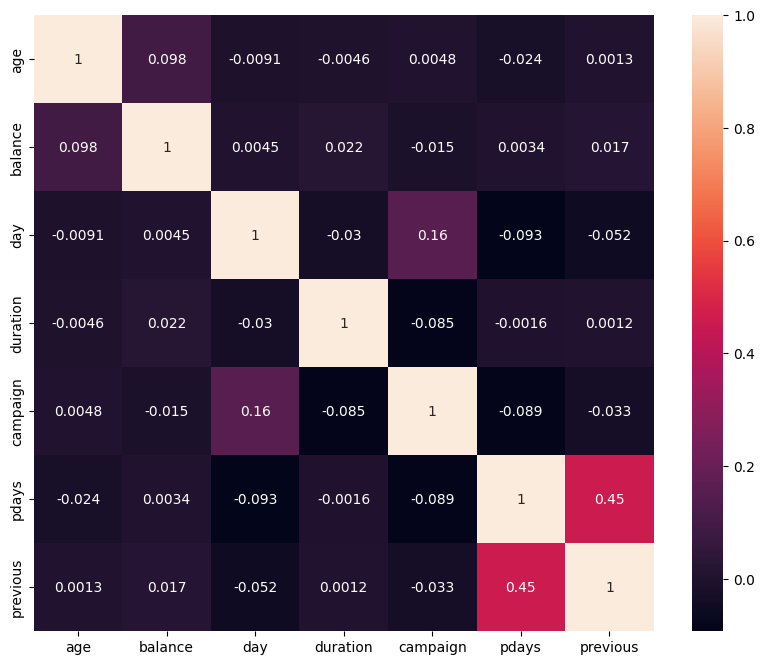

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(bmt_train.corr(), annot=True, ax=ax)